## Implementing Linear Regression from scratch using Adam in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating features
np.random.seed(100)
x = tf.constant(np.random.randint(100, size =(10,1)), dtype = tf.float32)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 8.],
       [24.],
       [67.],
       [87.],
       [79.],
       [48.],
       [10.],
       [94.],
       [52.],
       [98.]], dtype=float32)>

In [4]:
# Generating lables with w and b.
# w1 = 1  w2 = 3   b = 5
w = [2]
b = -5

# y = w1*x1 + w2*x2 + b 
m = tf.constant(np.asarray([w]), dtype = tf.float32)
b = tf.constant(b, dtype = tf.float32)
y = tf.squeeze(tf.matmul(m,x, transpose_b = True) + b)
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 11.,  43., 129., 169., 153.,  91.,  15., 183.,  99., 191.],
      dtype=float32)>

Text(0, 0.5, 'Y')

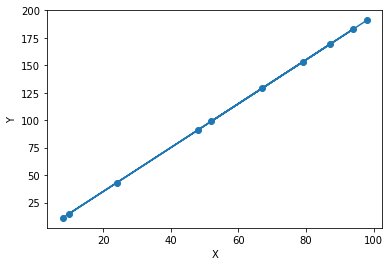

In [5]:
# visualizing the data for univariate
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")


In [6]:
# Computing rmse loss function
def compute_rmse(y_label, y_pred):
    return tf.sqrt(tf.reduce_mean(((y_label - y_pred)**2)))

def compute_mse(y_label, y_pred):
    return tf.reduce_mean(((y_label - y_pred)**2))


In [6]:
EPOCHS = 100
w_vector = np.random.uniform(-2,2, size =(x.shape[1],1))

w3 = tf.Variable(w_vector, dtype = tf.float32)
w4 = tf.Variable(0, dtype = tf.float32)

w1 = tf.Variable(w_vector, dtype = tf.float32)
w0 = tf.Variable(0, dtype = tf.float32)
lr = 1e-5
LOSS = []

for epoch in range(1,EPOCHS+1):
    with tf.GradientTape() as tape:
        y_pred = tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)
        loss = compute_mse(y, y_pred)
    
    gradients = tape.gradient(loss, [w1, w0])
    w1.assign_sub(gradients[0] * lr)
    w0.assign_sub(gradients[1] * lr)
    
    
    
#     Computing with equations for mse loss function
    y_pred1 = tf.squeeze(tf.matmul(w3,x, transpose_a = True, transpose_b = True) + w4)
    dw3 = tf.matmul(x, tf.reshape(y-y_pred, (x.shape[0],1)), transpose_a = True) * (-2/x.shape[0])
    dw4 = (-2 / x.shape[0]) * tf.reduce_sum(y - y_pred1)
    w3.assign_sub(dw3 * lr)
    w4.assign_sub(dw4 * lr)
    LOSS.append(loss)
    
    
    
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy(), gradients[1].numpy()))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy(), dw4.numpy()))
#     print()
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy() * lr, gradients[1].numpy() * lr))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy() * lr, dw4.numpy() * lr))
#     print()
#     print("After Epoch: {} w1: {} w0: {}".format(epoch, w1.numpy(), w0.numpy()))
#     print("After Epoch: {} w3: {} w4: {}".format(epoch, w3.numpy(), w4.numpy()))
#     print('Loss Tensorflow = {} Loss Equation = {}'.format(loss, compute_mse(y, y_pred1)))
#     print('---------------------------------------------------------------\n')
    
    
    
print('Final Results')
print('================================')
print('w1 : {}'.format(w1.numpy()))
print('w0 : {}'.format(w0.numpy()))
print('w3 : {}'.format(w3.numpy()))
print('w4 : {}'.format(w4.numpy()))
print('Final Loss : {}'.format(LOSS[-1]))

    


    
    

    

    
    

Final Results
w1 : [[-2.0664403]]
w0 : -0.01326847355812788
w3 : [[-2.0664403]]
w4 : -0.01326847355812788
Final Loss : 6.050972938537598


Text(0, 0.5, 'Loss')

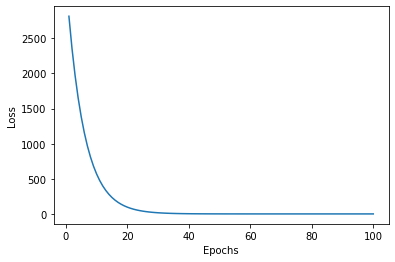

In [7]:
plt.plot(range(1,len(LOSS)+1), LOSS)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [8]:
def predict(x, w1, w0):
    return tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)

predict(x,w1, w0)

    

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ -16.544792,  -49.607834, -138.46478 , -179.79358 , -163.26207 ,
        -99.2024  ,  -20.677673, -194.25867 , -107.46816 , -202.52443 ],
      dtype=float32)>